[-70.] [-20.]
[-69.4] [-19.98776]
[-68.835784] [-19.97531879]
[-68.30268349] [-19.96268923]
[-67.79673002] [-19.94988254]
[-67.31452037] [-19.93690859]
[-66.85311109] [-19.92377601]
[-66.40993518] [-19.91049244]
[-65.98273556] [-19.89706454]
[-65.56951132] [-19.88349822]
[-65.1684739] [-19.86979861]
[-64.77801103] [-19.85597022]
[-64.39665667] [-19.84201694]
[-64.02306575] [-19.82794214]
[-63.65599262] [-19.81374865]
[-63.29427248] [-19.79943886]
[-62.93680512] [-19.7850147]
[-62.58254045] [-19.77047769]
[-62.23046543] [-19.75582892]
[-61.87959194] [-19.7410691]
[-61.52894541] [-19.72619854]
[-61.17755377] [-19.71121716]
[-60.82443659] [-19.69612451]
[-60.46859409] [-19.68091969]
[-60.10899568] [-19.66560145]
[-59.74456793] [-19.65016808]
[-59.3741815] [-19.63461741]
[-58.99663679] [-19.61894683]
[-58.61064789] [-19.6031532]
[-58.21482433] [-19.58723282]
[-57.80765013] [-19.57118142]
[-57.3874594] [-19.55499404]
[-56.95240771] [-19.53866501]
[-56.50043809] [-19.52218786]
[-56.02924033]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

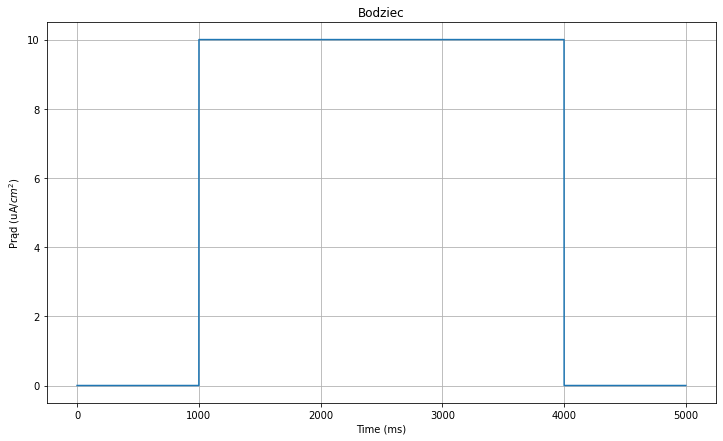

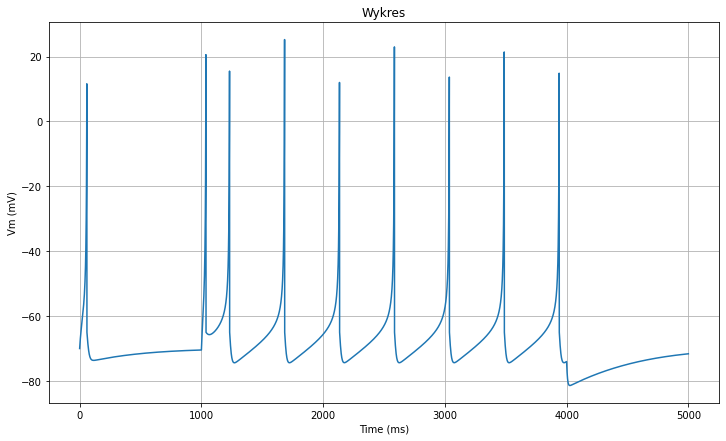

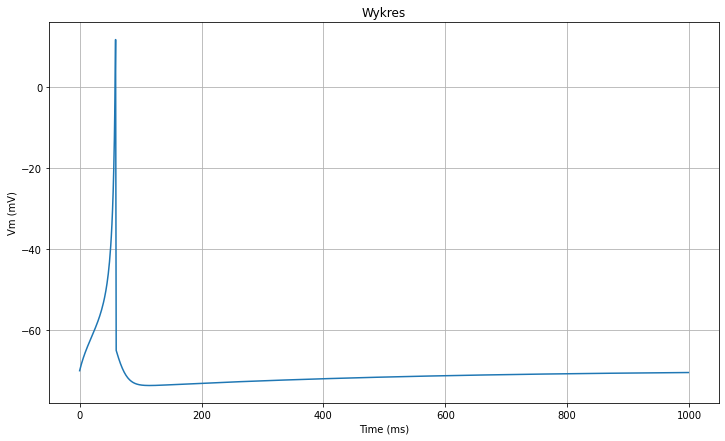

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
from google.colab import files

class Izhikevich(object):
  def __init__(self, a = 0.02, b = 0.2, c = -65, d = 8, ypeak = 30, tau = 0.1, V_curr = -70, U_curr = -20, time = 5000, poczatek = 1000, koniec=4000):
    self.a=a
    self.b=b
    self.c=c
    self.d=d
    self.ypeak=ypeak
    self.tau=tau
    self.V_curr=V_curr
    self.U_curr=U_curr
    self.time=time
    self.poczatek=poczatek
    self.koniec=koniec
  
  def I_init(self, t):
    if (self.poczatek< t <self.koniec):
      return 10
    else:
      return 0

  def izhikevich_model(self):
    t=np.arange(0,self.time)

    V=np.zeros((self.time,1))
    U=np.zeros((self.time,1))
    V_curr=np.zeros((self.time,1))
    U_curr=np.zeros((self.time,1))
    V[0]=-70
    U[0]=-20
    for i in range(self.time-1):
      V_curr[i+1]=V[i]+(self.tau*((0.04*V[i]+5)*V[i]+140-U[i]+self.I_init(t[i+1])))
      if(V_curr[i+1]>self.ypeak):
        V[i+1]=self.c
      else:
        V[i+1]=V_curr[i+1]
      U_curr[i+1]=U[i]+self.tau*self.a*(self.b*V[i+1]-U[i])
      if(V_curr[i+1]>self.ypeak):
        U[i+1]=U_curr[i+1]+self.d
      else:
        U[i+1]=U_curr[i+1]
      print(V[i],U[i])
    return V, U
  
  def show(self, X, nazwa):
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(X)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vm (mV)')
    ax.set_title('Wykres')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png")

 
  def show_I(self,nazwa):
    Idv = [self.I_init(t) for t in range(self.time)]

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(Idv)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel(r'Prąd (uA/$cm^2$)')
    ax.set_title('Bodziec')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png") 
  
  
iz = Izhikevich()
V=iz.izhikevich_model()
iz.show_I("pradwykres")
iz.show(V[0], "wykresV")
iz.show(V[0][0:1000],"wykresPrzyblizony")
